In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load Data Set

In [2]:
df = pd.read_csv("movies.csv")

# Inspect Data

In [3]:
# overview
df.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States


In [4]:
# overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2000 non-null   object 
 1   Rating             1999 non-null   float64
 2   Year               2000 non-null   int64  
 3   Month              2000 non-null   object 
 4   Certificate        1966 non-null   object 
 5   Runtime            2000 non-null   object 
 6   Directors          2000 non-null   object 
 7   Stars              2000 non-null   object 
 8   Genre              2000 non-null   object 
 9   Filming_location   2000 non-null   object 
 10  Budget             2000 non-null   object 
 11  Income             2000 non-null   object 
 12  Country_of_origin  2000 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 203.2+ KB


In [5]:
# list all columns
df.columns

Index(['Title', 'Rating', 'Year', 'Month', 'Certificate', 'Runtime',
       'Directors', 'Stars', 'Genre', 'Filming_location', 'Budget', 'Income',
       'Country_of_origin'],
      dtype='object')

In [6]:
# check duplicates
df.loc[df.duplicated(keep=False)]

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin


In [7]:
df.nunique()

Title                1989
Rating                 62
Year                   20
Month                  14
Certificate            12
Runtime               113
Directors            1082
Stars                1990
Genre                 244
Filming_location       97
Budget                305
Income               1856
Country_of_origin     406
dtype: int64

In [8]:
# check unique values
df["Budget"].unique()

array(['$350,000,000 ', '$35,000,000 ', '$85,900,000 ', 'Unknown',
       '$12,000,000 ', '$120,000,000 ', '$80,000,000 ', '$20,000,000 ',
       '$10,000,000 ', '$40,000,000 ', '$78,000,000 ', '$1,000,000 ',
       '$16,000,000 ', '$195,000,000 ', '$100,000,000 ', '$250,000,000 ',
       '€ 10,000,000', '$25,000,000 ', '$3,000,000 ', '$150,000,000 ',
       '$170,000,000 ', '$17,000,000 ', '$200,000,000 ', '$4,500,000 ',
       '$32,000,000 ', '$60,000,000 ', '$72,000,000 ', '$2,000,000 ',
       '$68,000,000 ', '$24,000,000 ', '$9,000,000 ', '$50,000,000 ',
       '$90,000,000 ', '$250,000 ', '$85,000,000 ', '$8,000,000 ',
       '₹3,500,000,000', '$22,000,000 ', '€ 7,500,000', '$165,000,000 ',
       'CA$15,000', '$30,000,000 ', '$185,000,000 ', '$75,000,000 ',
       '$18,000,000 ', '$55,000,000 ', '$43,000,000 ', '€ 5,000,000',
       '$300,000,000 ', 'SEK\xa019,000,000', '$190,000,000 ',
       '$15,000,000 ', '$160,000,000 ', '$70,000,000 ', '$24,350,000 ',
       '$820,000 ', '

In [9]:
df["Runtime"].unique()

array(['192', '117', '127', '114', '102', '132', '134', '112', '151',
       '107', '188', '105', '131', '125', '126', '98', '101', '161',
       '140', '147', '139', '97', '154', '123', '130', '115', '176', '87',
       '129', '104', '99', '93', '137', '128', '100', '148', '158', '96',
       '86', '108', '124', '89', '111', '103', '135', '95', '119', '136',
       '77', '118', '138', '159', '122', '187', '146', '121', '91', '116',
       '167', '113', '110', '141', '92', '155', '163', '106', '133', '88',
       '150', '156', '242', '109', '143', '152', '83', '120', '90', '144',
       '179', '142', '160', '94', '85', '181', '209', '169', '84', '149',
       '78', '75', '164', '70', '145', '79', '82', '168', '165',
       'Unknown', '153', '180', '50', '157', '172', '80', '162', '170',
       '166', '81', '191', '71', '175', '201', '178'], dtype=object)

In [10]:
df["Certificate"].unique()

array(['PG-13', 'PG', 'R', 'TV-14', 'TV-MA', 'TV-PG', 'TV-Y7',
       'Not Rated', nan, 'NC-17', 'TV-G', 'Unrated', 'G'], dtype=object)

# Data Cleaning

In [11]:
df.drop(["Title"],axis=1,inplace=True)

In [12]:
# percentage of nan values by column
df.isna().sum()

Rating                1
Year                  0
Month                 0
Certificate          34
Runtime               0
Directors             0
Stars                 0
Genre                 0
Filming_location      0
Budget                0
Income                0
Country_of_origin     0
dtype: int64

In [13]:
# updates the "Certificate" value for the selected rows 
# with the corresponding mode value associated with the first genre
invalid_certificates = ["Unrated", "Not Rated", np.nan]
genre_mode = df.groupby(df["Genre"].str.split(",").str[0])["Certificate"].transform(lambda x: x.mode().iloc[0])
mask = df["Certificate"].isin(invalid_certificates)
df.loc[mask,"Certificate"] = genre_mode[mask]


In [14]:
# percentage of missing values recorded as "unknown"
def check_unknowns():
    for col in df.columns:
        unknown_percent = (df[col] == 'Unknown').sum() / len(df) * 100
        print(f"{col}: {unknown_percent:.2f}%")
check_unknowns()

Rating: 0.00%
Year: 0.00%
Month: 0.00%
Certificate: 0.00%
Runtime: 0.10%
Directors: 0.00%
Stars: 0.00%
Genre: 0.00%
Filming_location: 3.80%
Budget: 15.20%
Income: 7.25%
Country_of_origin: 0.00%


In [15]:
# turn all unknown values into 0s for later processing
for col in ["Budget", "Income", "Runtime"]:
    df[col].replace("Unknown", "0", inplace=True)

In [16]:
# conversion values 03/11/23
conversion_dict = {
    '$': 1.0,
    '€': 1.07,
    '£': 1.21,
    '₩': 0.00078,
    'C': 0.73,
    '₹': 0.012,
    '¥': 0.0075,
    'A': 0.68,
    'S': 0.095,
    'D': 0.14,
    'N': 0.10 
}

In [17]:
import re
# strip each value of its symbol and convert the value
# based on the symbol as per the dictionary
for col in ["Budget", "Income"]:
    df[col] = df[col].apply(lambda x: 
                                  int(re.sub("[^0-9]", "", x)) * conversion_dict.get(x[0], 1))

In [18]:
df["Runtime"] = df["Runtime"].astype(int)
# turn all unknown values, 0s, into nans 
df.loc[:, ["Budget", 
           "Income", 
           "Runtime"]] = df.loc[:, ["Budget", 
                                    "Income", 
                                    "Runtime"]].replace(0, np.nan)

In [19]:
# fill nan values for runtime, budget, income,
df["Runtime"].dropna(inplace=True)
df["Income"].fillna(df["Income"].median(),inplace=True)
df["Budget"].fillna(df["Budget"].median(),inplace=True)

In [20]:
df.isna().sum()

Rating               1
Year                 0
Month                0
Certificate          0
Runtime              2
Directors            0
Stars                0
Genre                0
Filming_location     0
Budget               0
Income               0
Country_of_origin    0
dtype: int64

In [21]:
df.loc[df["Runtime"].isnull(), :]

,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
848,2.1,2014,2014,R,NaN,Enzo Zelocchi,"Enzo Zelocchi, Miryam Negrin, Paul Gregory, Ma...","Comedy, Drama, Thriller",USA,250000.0,90842646.0,United States
1249,9.6,2010,September,PG-13,NaN,Enzo Zelocchi,"Enzo Zelocchi, Charlotte Labadie, David M Edel...","Romance, Drama, Family",Unknown,10.0,90842646.0,United States


In [22]:
df.loc[df["Rating"].isnull(), :]

,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
85,NaN,2022,January,PG-13,126.0,Marc Forster,"Tom Hanks, Rachel Keller, Manuel Garcia Rulfo,...","Comedy, Drama",USA,40000000.0,90842646.0,"Sweden, United States"


In [23]:
df.drop(index=[85, 1249, 848], inplace=True)

df.reset_index(drop=True, inplace=True)

In [24]:
# fill unknown values with most common
df["Filming_location"] = df["Filming_location"].replace("Unknown", "USA")

In [25]:
# drop the two rows with wrong month value
df = df.drop(df[df["Month"] == "2014"].index)
df = df.drop(df[df["Month"] == "2008"].index)

In [26]:
# years from string to integers
df["Year"] = df["Year"].astype(int)

In [27]:
# check if all unkowns have been taken care of
check_unknowns()

Rating: 0.00%
Year: 0.00%
Month: 0.00%
Certificate: 0.00%
Runtime: 0.00%
Directors: 0.00%
Stars: 0.00%
Genre: 0.00%
Filming_location: 0.00%
Budget: 0.00%
Income: 0.00%
Country_of_origin: 0.00%


In [28]:
# check dataframe after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1996 entries, 0 to 1996
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             1996 non-null   float64
 1   Year               1996 non-null   int64  
 2   Month              1996 non-null   object 
 3   Certificate        1996 non-null   object 
 4   Runtime            1996 non-null   float64
 5   Directors          1996 non-null   object 
 6   Stars              1996 non-null   object 
 7   Genre              1996 non-null   object 
 8   Filming_location   1996 non-null   object 
 9   Budget             1996 non-null   float64
 10  Income             1996 non-null   float64
 11  Country_of_origin  1996 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 202.7+ KB


# Exploratory Data Analysis

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,1996.0,6.667685e+00,9.041718e-01,1.90,6.20,6.7,7.300000e+00,9.000000e+00
Year,1996.0,2.012498e+03,5.768334e+00,2003.00,2007.00,2012.5,2.017250e+03,2.022000e+03
Runtime,1996.0,1.132179e+02,1.961313e+01,50.00,99.00,110.0,1.240000e+02,2.420000e+02
Budget,1996.0,5.804498e+07,5.647101e+07,11.77,20000000.00,40000000.0,7.500000e+07,3.560000e+08
Income,1996.0,1.818519e+08,2.685744e+08,305.00,29568734.25,90842646.0,2.084946e+08,2.922918e+09


In [30]:
# create a Profit column
df['Profit'] = (df['Income'] - df['Budget']).apply(lambda x: round(x, -6))

# Create a new column for ROI
df['ROI'] = (df['Income'] - df['Budget']) / df['Budget']

In [31]:
df['ROI'].describe()

count      1996.000000
mean        242.325442
std        7316.282702
min          -0.999992
25%           0.164218
50%           1.384460
75%           3.353567
max      282997.897196
Name: ROI, dtype: float64

In [32]:
# remove Budget values less than 1000 as those are likely typos or extreme outliers at best
df = df[df["Budget"] > 1000]

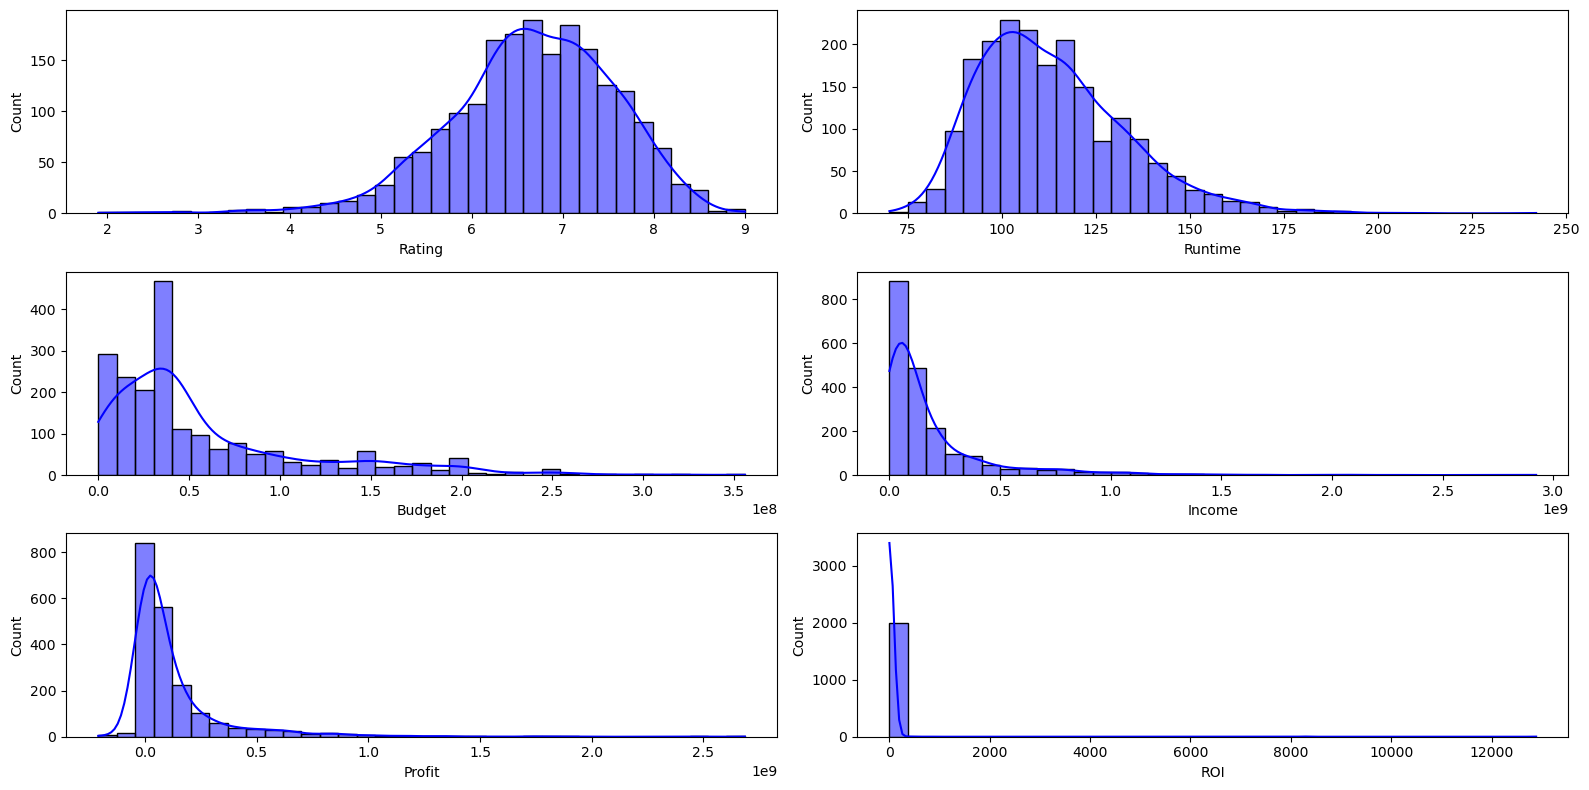

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot histogram for all numerical values
num_values = ["Rating", "Runtime", "Budget", "Income", "Profit", "ROI"]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 8))

for i, col in enumerate(num_values):
    sns.histplot(data=df,
                 x=col,
                 bins=35,
                 kde=True,
                 color='blue',
                  ax=axs[i//2, i%2])
    axs[i//2, i%2].set_xlabel(col)
    
# axs[2,1].axis('off')

plt.tight_layout()
plt.show()


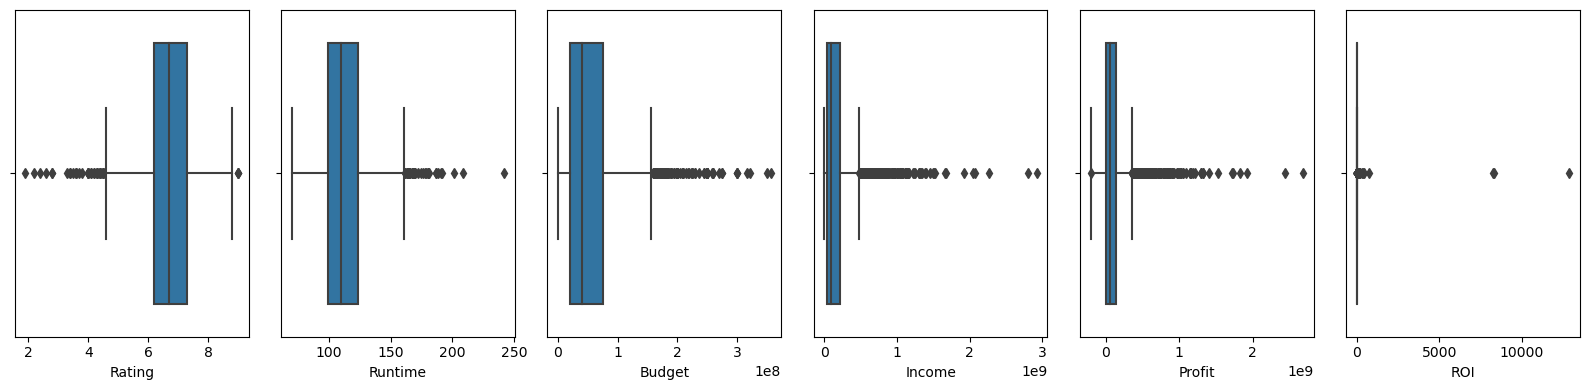

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=len(num_values), figsize=(16, 4))

for i, col in enumerate(num_values):
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

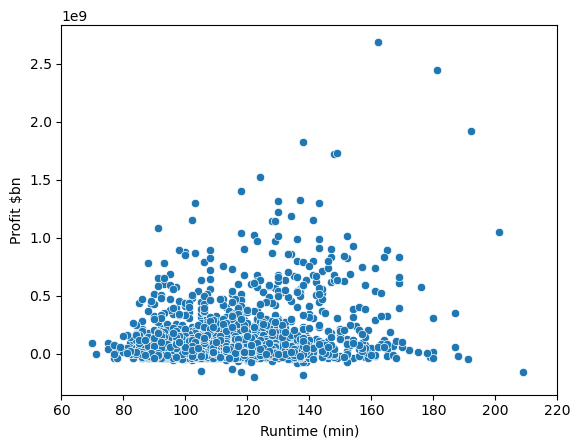

In [35]:
# Draw a categorical scatterplot to show each observation
ax = sns.scatterplot(data=df, x="Runtime", y="Profit")
ax.set(ylabel="Profit $bn")
ax.set(xlabel="Runtime (min)")
ax.set_xlim(60, 220)
plt.show

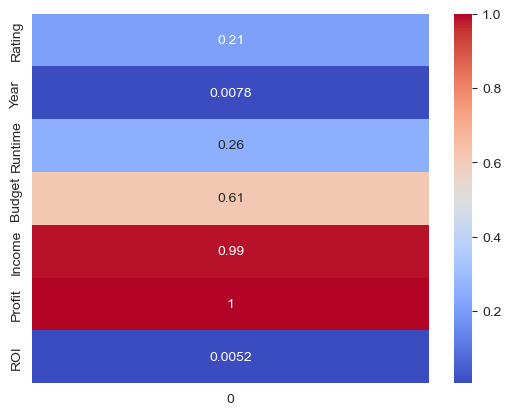

In [94]:
# calculate the correlation coefficients
corr_matrix = df.corrwith(df["Profit"])

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix.to_frame(), cmap='coolwarm', annot=True)
plt.show()

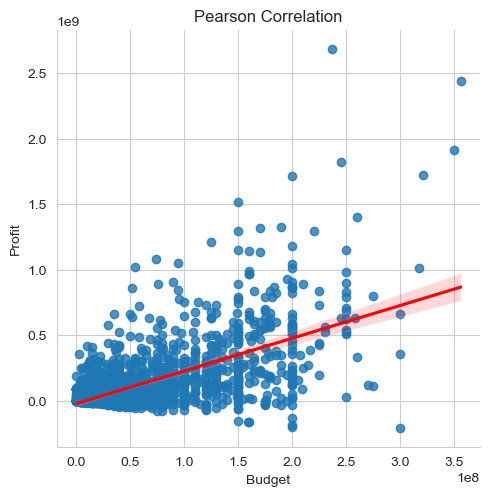

In [96]:
# create a scatter plot with a regression line
sns.lmplot(x='Budget', y='Profit', data=df, line_kws={'color': 'red'})
plt.title('Pearson Correlation')
plt.show()

In [38]:
def most_freq(col, n):
    tmp_df = df[[col]].copy()
    tmp_df[col] = [x.split(', ') for x in tmp_df[col]]
    most_freq_elements = tmp_df[col].explode().value_counts().index[:n].tolist()
    return most_freq_elements

In [39]:
top_genre = most_freq("Genre", 10)
top_stars = most_freq("Stars", 15)
top_directors = most_freq("Directors", 10)
top_country_of_origin = most_freq("Country_of_origin", 10)

In [40]:
print("### Top 10 Genre ###\n ", top_genre)
print("\n### Top 15 Stars ###\n ", top_stars)
print("\n### Top 10 Directors ###\n ", top_directors)
print("\n### Top 10 Countries of Origin ###\n ", top_country_of_origin)

### Top 10 Genre ###
  ['Drama', 'Comedy', 'Action', 'Adventure', 'Thriller', 'Crime', 'Romance', 'Horror', 'Mystery', 'Sci-Fi']

### Top 15 Stars ###
  ['Dwayne Johnson', 'Mark Wahlberg', 'Ryan Reynolds', 'Matt Damon', 'Amy Adams', 'Scarlett Johansson', 'Brad Pitt', 'Cate Blanchett', 'Samuel L Jackson', 'Liam Neeson', 'Tom Hanks', 'Jake Gyllenhaal', 'Colin Farrell', 'Gerard Butler', 'Christian Bale']

### Top 10 Directors ###
  ['Ridley Scott', 'Steven Spielberg', 'Antoine Fuqua', 'Clint Eastwood', 'Shawn Levy', 'Michael Bay', 'Quentin Tarantino', 'Tim Burton', 'Zack Snyder', 'Robert Rodriguez']

### Top 10 Countries of Origin ###
  ['United States', 'United Kingdom', 'Canada', 'France', 'Germany', 'China', 'Japan', 'Australia', 'Spain', 'Italy']


In [184]:
def measure_target(category, top_elements, df, target, measure):
    """
    Computes the target variable measured by the given category and top elements.

    Parameters:
    category (str): The name of the category to measure by.
    top_elements (list of str): The top elements to measure the target variable for within the category.
    target (str): The name of the target variable to measure.
    measure (str or function): The measure to use to aggregate the target variable. This can be a string
        specifying the name of the function to use (e.g., 'mean', 'median', 'sum'), or a function object
        that takes a Series and returns a scalar.

    Returns:
    dict of {str: float}: A dictionary where each key is an element and the corresponding value is the
        measured target variable for that element.
    """
    measure_target_top_elements = {}
    for element in top_elements:
        measure_target = df.loc[df[category].str.contains(element), target].agg(measure)
        # add every element's ROI, average, or median Profit rounding to the nearest 100 thousands
        measure_target_top_elements[element] = measure_target #if not pd.isna(measure_target) else -1
        # sort the dictionary in ascending order
        measure_target_top_elements = dict(sorted(measure_target_top_elements.items(),
                                                  key=lambda item: item[1], reverse=True))
    return measure_target_top_elements


def plot_target_by_category(target, measure, categories=None, top_elements_dict=None, y_metric=1e8, y_tick_upper=3.5):
    
    """
    Plots a bar chart of a target variable measured by category, either for a list of categorical variables or for the top elements
    within each category.
    
    Parameters:
    target (str): The name of the target variable to plot.
    measure (str): The type of measure to use for the target variable (e.g. 'median', 'mean', 'sum', 'count').
    categories (list of str): The names of the categories to plot. Either this or top_elements_dict must be provided.
    top_elements_dict (dict of {str: list of str}): A dictionary where each key is a category and the corresponding value
        is a list of the top elements to plot within that category. Either this or categories must be provided.
    y_metric (float): The scaling factor to use for the y-axis tick labels (default is 1e8).
    y_tick_upper (float): The upper limit of the y-axis tick labels (default is 3.5)
    """
    
    # Validate input parameters
    if categories is None and top_elements_dict is None:
        raise ValueError("Either 'categories' or 'top_elements_by_category' argument must be provided.")
    if categories is not None and not isinstance(categories, list):
        raise ValueError("The 'categories' argument must be a list.")
    if top_elements_dict is not None and not isinstance(top_elements_dict, dict):
        raise ValueError("The 'top_elements_by_category' argument must be a dictionary.")
    if not callable(measure) and not isinstance(measure, str):
        raise ValueError("The 'measure' argument must be ea string.")

    if top_elements_dict is not None:
        # Create a dictionary containing the category and a list of x and y values of the top elements
        data_to_plot = {}
        for idx, (category, top_elements) in enumerate(top_elements_dict.items()):
            # Compute the target variable measured by the given category and top elements
            target_measured_top_elements = measure_target(category, top_elements, df, target, measure)
            # Add the category and a tuple of the top elements and their corresponding target values to dict_xy
            x, y = list(target_measured_top_elements.keys()), list(target_measured_top_elements.values())
            data_to_plot[idx] = [category, (x, y)]

    else:
        # Create a dictionary containing the category and a list of x and y values
        data_to_plot = {}
        for idx, category in enumerate(categories):
            target_measured_by_category = df.groupby(category)[target].agg(measure).sort_values(ascending=False)
            # get x and y axis values
            x, y = target_measured_by_category.index, target_measured_by_category.values
            # add x,y as tuple to list
            data_to_plot[idx] = [category, (x, y)]

    # get number of rows dynamically
    num_plots = len(data_to_plot)
    max_cols = 2

    # Calculate number of rows and columns needed
    num_rows = math.ceil(num_plots / max_cols)
    num_cols = math.ceil(num_plots / num_rows)

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 4*num_rows))

    # Check if axs is an ndarray before flattening
    if isinstance(axs, np.ndarray):
        axs = axs.flatten()
    else:
        axs = [axs]
    
    # Loop through each subplot and create a bar plot
    for i, ax in enumerate(axs):

        # Create the bar plot
        sns.set_style("whitegrid")
        sns.barplot(x=data_to_plot[i][1][0], y=data_to_plot[i][1][1], data=df, ax=ax)

        # Set the x and y axis labels
        ax.set_xlabel(data_to_plot[i][0])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9)
        ax.set_ylabel(f"{target} ({measure})")
        ax.set_yticks(ticks=np.arange(0, y_tick_upper, 0.5) * y_metric)
        ax.tick_params(axis='both', which='major', labelsize=9)

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.5, hspace=0.75)

    # Show the plot
    plt.show()


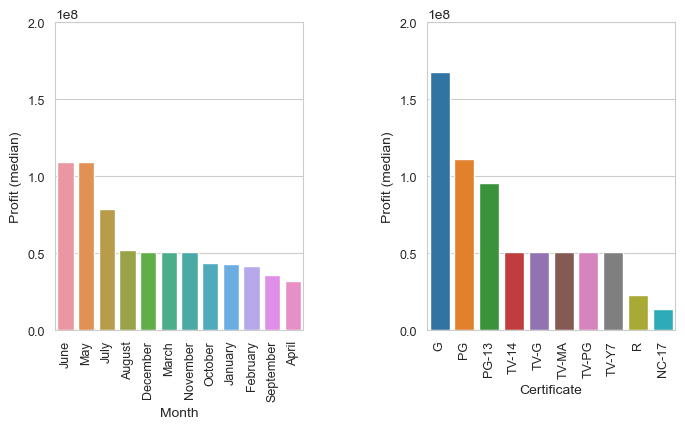

In [172]:
categories=["Month", "Certificate"]

plot_target_by_category("Profit", "median", categories=categories, y_metric=1e8, y_tick_upper=2.5)

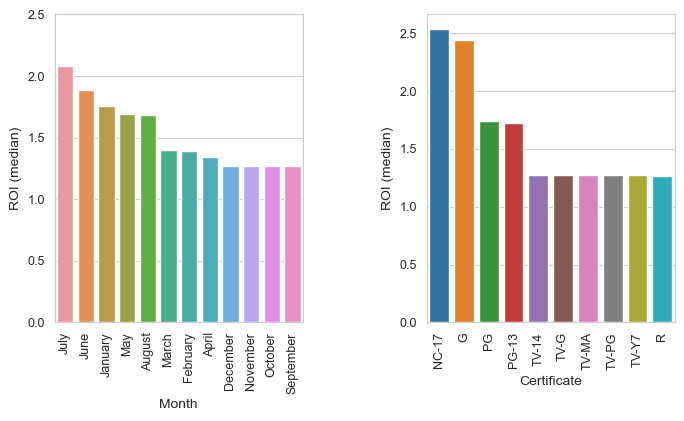

In [92]:
plot_target_by_category("ROI", "median", categories=categories, y_metric=1, y_tick_upper=3)

In [65]:
top_elements_dict = {"Stars": top_stars, "Directors": top_directors, 
                     "Genre": top_genre, "Country_of_origin": top_country_of_origin}

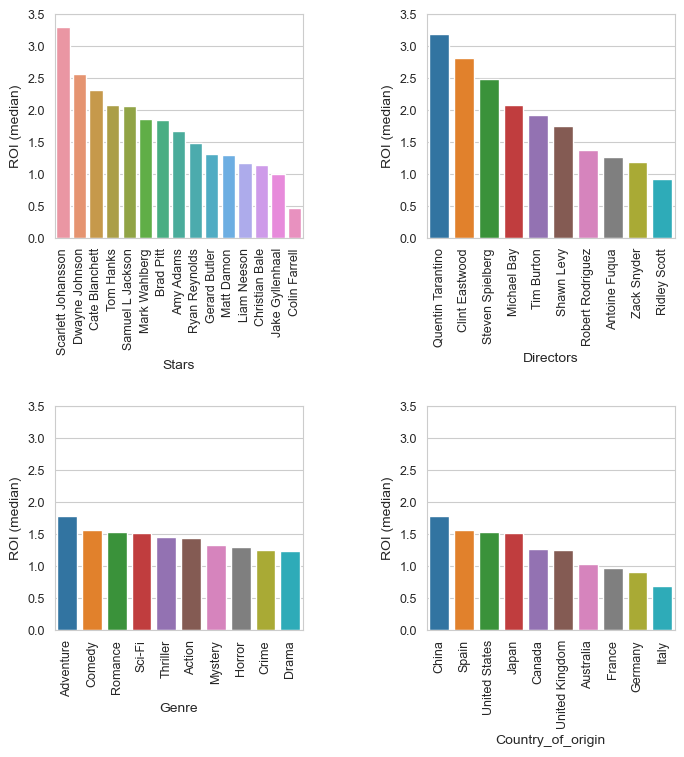

In [79]:
plot_target_by_category("ROI", "median", top_elements_dict=top_elements_dict, y_metric=1, y_tick_upper=4)

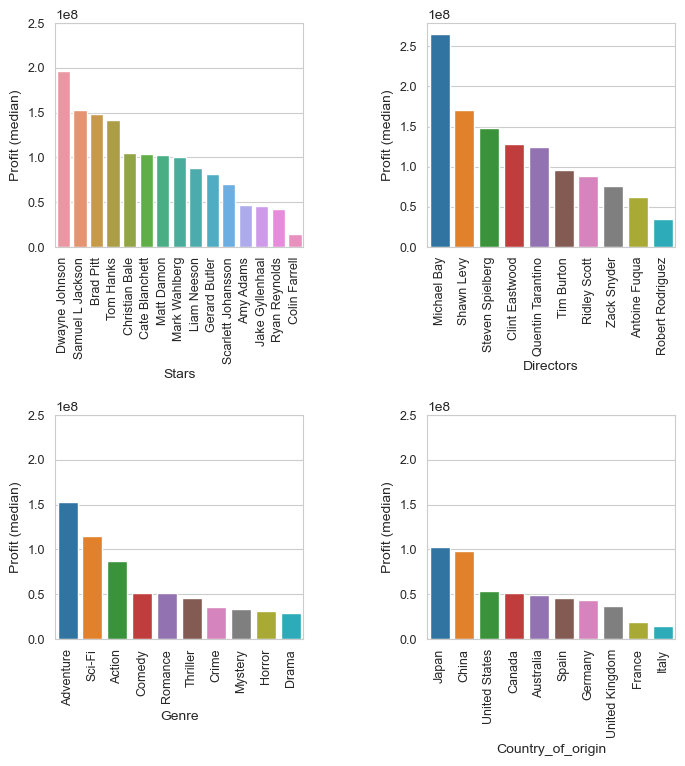

In [80]:
plot_target_by_category("Profit", "median", top_elements_dict=top_elements_dict, y_metric=1e8, y_tick_upper=3)

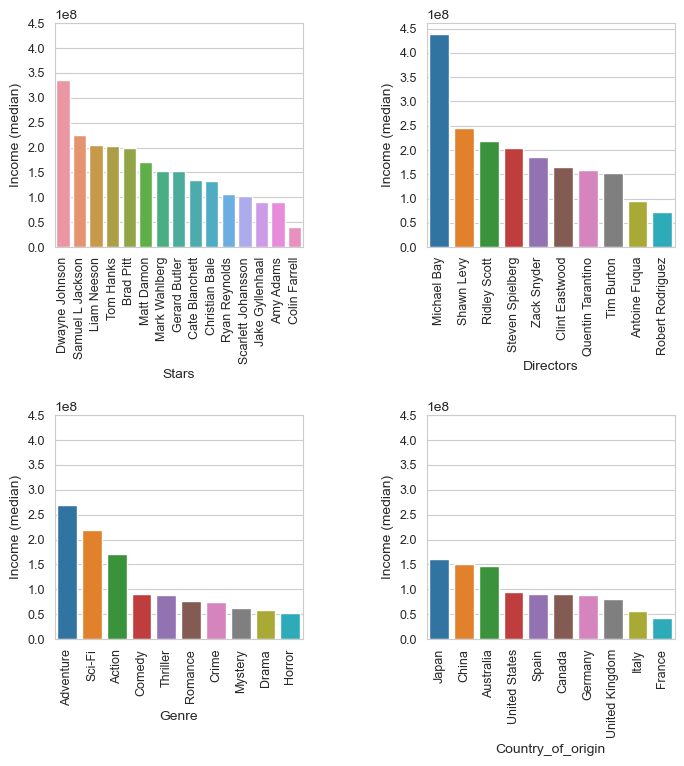

In [89]:
plot_target_by_category("Income", "median", top_elements_dict=top_elements_dict, y_metric=1e8, y_tick_upper=5)

In [149]:
def create_bins(column, percentiles, labels):
    
    def extract_counts(column):
        # Split values in column by commas and create a series with a list of values for each row
        star_lists = df[column].str.split(", ")

        # Count the occurrences of each value in the series after exploding the lists
        star_counts = star_lists.explode().value_counts()

        # Calculate the total appearances of all values in each row's list and return as a series
        cast_counts = star_lists.apply(lambda stars: star_counts[stars].sum())
        return cast_counts

    # Extract the counts for the given column
    cast_counts = extract_counts(column)
    
    # compute the count cut offs based on the percentile cut offs 
    cut_offs = cast_counts.quantile(percentiles)

    # Create a list of bin edges based on the count cut offs
    bin_edges = [-float("inf")] + list(cut_offs) + [float("inf")]

    # Create bins using bin edges and labels
    bins = pd.cut(cast_counts, 
                  bins=bin_edges, 
                  labels=labels,
                  include_lowest=True, 
                  duplicates='drop',
                  ordered=False)

    # Add binned column to the original dataframe
    df[f"{column}_class"] = bins


In [151]:
# create the new columns and define the categories
create_bins("Stars", [0.25, 0.5, 0.75, 0.95], ["unknown", "known", "well_known", "famous", "iconic"])
create_bins("Directors", [0.5, 0.75, 0.97], ["unknown", "known", "well_known", "famous"])

Profit                                                       \
             count          mean           std          min         25%   
Stars_class                                                               
unknown      510.0  5.209216e+07  1.231403e+08  -70000000.0  -5000000.0   
known        527.0  8.548577e+07  1.788172e+08 -186000000.0  -2000000.0   
well_known   481.0  1.646549e+08  2.612742e+08 -150000000.0  13000000.0   
famous       388.0  1.839330e+08  2.579545e+08 -209000000.0  29000000.0   
iconic        88.0  2.825227e+08  4.129427e+08 -160000000.0  43750000.0   

                                                     
                     50%          75%           max  
Stars_class                                          
unknown       22000000.0   62750000.0  1.043000e+09  
known         42000000.0   99000000.0  1.717000e+09  
well_known    67000000.0  196000000.0  1.918000e+09  
famous        98000000.0  249250000.0  2.686000e+09  
iconic       151000000.0  301750000.0  2.442000e+09

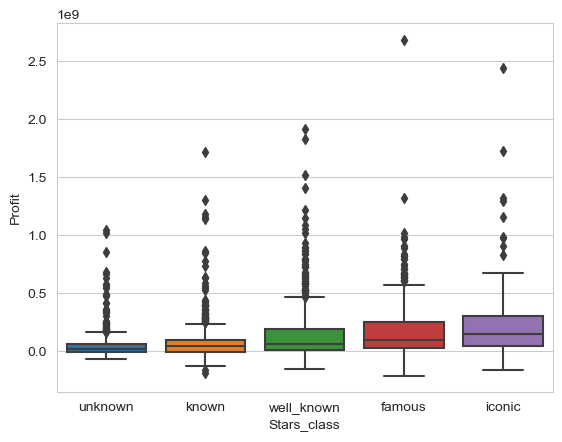

In [152]:
# inspect the new columns
sns.boxplot(data=df, x='Stars_class', y='Profit')
df[["Profit", "Stars_class"]].groupby("Stars_class").describe()

Profit                                                       \
                  count          mean           std          min         25%   
Directors_class                                                                
unknown          1204.0  8.305897e+07  1.904146e+08 -186000000.0  -2000000.0   
known             348.0  1.602471e+08  2.325630e+08 -160000000.0  16250000.0   
well_known        397.0  2.023904e+08  2.681181e+08 -209000000.0  32000000.0   
famous             45.0  2.428222e+08  4.598986e+08 -200000000.0  29000000.0   

                                                         
                         50%          75%           max  
Directors_class                                          
unknown           35000000.0   89250000.0  2.686000e+09  
known             81000000.0  187250000.0  1.319000e+09  
well_known       103000000.0  277000000.0  1.825000e+09  
famous           119000000.0  214000000.0  2.442000e+09

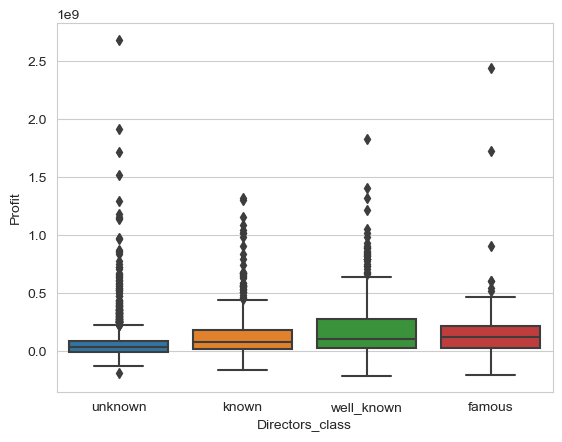

In [154]:
# inspect the new columns
sns.boxplot(data=df, x='Directors_class', y='Profit')
df[["Profit", "Directors_class"]].groupby("Directors_class").describe()

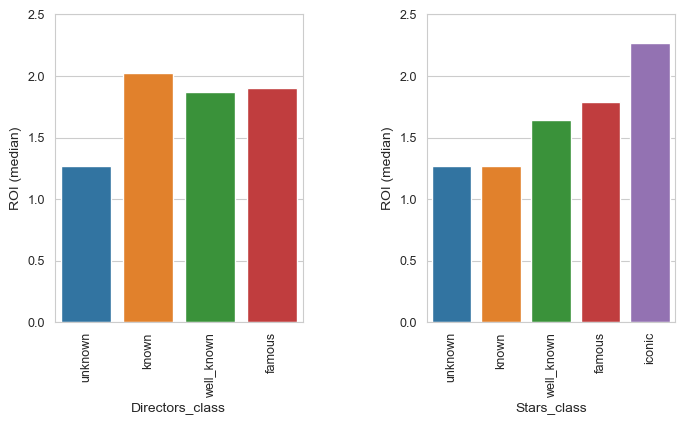

In [186]:
plot_target_by_category("ROI", "median", categories=[ "Directors_class", "Stars_class"], y_metric=1, y_tick_upper=3)

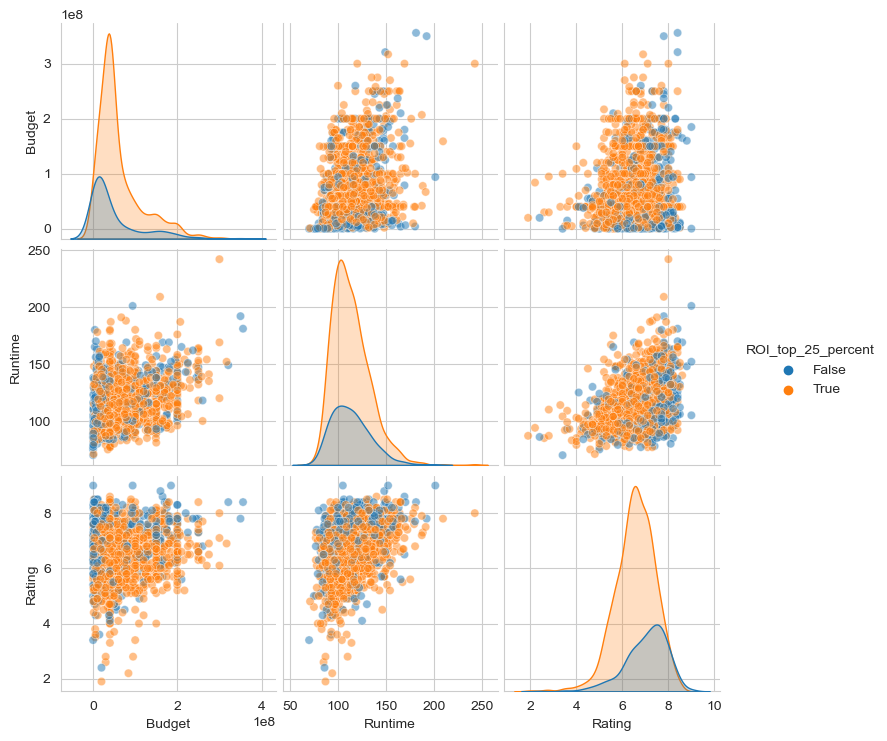

In [187]:
# Create a new column to identify if ROI is below threshold
df['ROI_bottom_25_percent'] = df['ROI'] < df['ROI'].quantile(0.25)
df['ROI_top_25_percent'] = df['ROI'] < df['ROI'].quantile(0.75)

# Select variables to plot
numerics_to_plot = ['Budget', "Runtime", "Rating"]
categoricals_to_plot = ['Stars_class', 'Directors_class', 'Month']

# Create scatter plot matrix using seaborn with df_below_threshold as hue
sns.pairplot(df, vars=numerics_to_plot, hue='ROI_top_25_percent', plot_kws={'alpha':0.5})
plt.show()

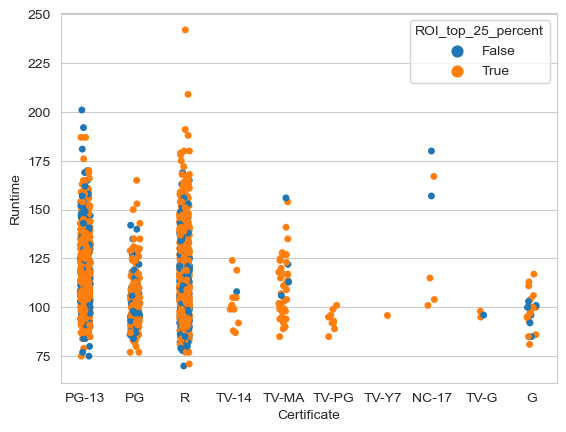

In [197]:
# Draw a categorical scatterplot to show each observation
ax = sns.stripplot(data=df, x="Certificate",y="Runtime", hue="ROI_top_25_percent")

# Regression Model

## feature engineering

In [198]:
df.columns

Index(['Rating', 'Year', 'Month', 'Certificate', 'Runtime', 'Directors',
       'Stars', 'Genre', 'Filming_location', 'Budget', 'Income',
       'Country_of_origin', 'Profit', 'ROI', 'Stars_class', 'Directors_class',
       'ROI_bottom_25_percent', 'ROI_top_25_percent'],
      dtype='object')

In [199]:
df.dtypes

Rating                    float64
Year                        int64
Month                      object
Certificate                object
Runtime                   float64
Directors                  object
Stars                      object
Genre                      object
Filming_location           object
Budget                    float64
Income                    float64
Country_of_origin          object
Profit                    float64
ROI                       float64
Stars_class              category
Directors_class          category
ROI_bottom_25_percent        bool
ROI_top_25_percent           bool
dtype: object

In [205]:
df_model = df.copy()

In [206]:
columns = ["Genre", "Filming_location", "Country_of_origin", "Certificate"]

# function for most of the remaining columns that need to be changed
for col in columns:
    tmp_df = df_model[col].str.get_dummies(sep=", ").add_prefix(f"{col}_")
    tmp_df = tmp_df.iloc[:, 1:]  # Drop the first column
    df_model = pd.concat([df_model, tmp_df], axis=1)
    df_model = df_model.drop(col, axis=1)

In [207]:
for col in ["Stars_class", "Directors_class", "Month"]:
    df_model = pd.get_dummies(df_model, columns=[col], drop_first=True)

In [208]:
to_drop = [ "Directors", "Stars", "Profit", "ROI", "Rating", "ROI_top_25_percent", "ROI_bottom_25_percent"]
df_model = df_model.drop(to_drop, axis=1)

## Model Income Prediction

In [209]:
from sklearn.preprocessing import FunctionTransformer

# Separate the target variable and input features
X = df_model.drop("Income", axis=1)
y = df_model["Income"]

# Define a log transformation function
log_transform = FunctionTransformer(np.log1p)

# Apply the log transformation to the X data
X["Budget"] = log_transform.transform(X["Budget"])
X["Runtime"] = log_transform.transform(X["Runtime"])

# Apply the log transformation to the y data
y = log_transform.transform(y)


In [210]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [211]:
import plotly.express as px 

# visualize correlation between features
corr = X_train.corr()
# sns.heatmap(corr, cmap='coolwarm', annot=True)
# plt.show()

# potentially drop highly correleated features
cor_matrix = X_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)


print("Highly correlated feature(s) dropped: ", to_drop)

Highly correlated feature(s) dropped:  ['Country_of_origin_Chile', 'Country_of_origin_Croatia', 'Country_of_origin_Cyprus', 'Country_of_origin_Iran', 'Country_of_origin_Ireland', 'Country_of_origin_Israel', 'Country_of_origin_Kenya', 'Country_of_origin_Lebanon', 'Country_of_origin_Paraguay', 'Country_of_origin_Qatar', 'Country_of_origin_Serbia', 'Country_of_origin_Slovenia', 'Country_of_origin_South Korea', 'Country_of_origin_Uruguay', 'Certificate_R']


In [212]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np

# Create a linear regression model
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

# Use the model to make predictions on the test set
Y_pred = lr.predict(X_test)

# Calculate the metrics
mae = mean_absolute_error(y_test.values.ravel(), Y_pred)
mse = mean_squared_error(y_test.values.ravel(), Y_pred)
mape = mean_absolute_percentage_error(y_test, Y_pred)
r2 = r2_score(y_test.values.ravel(), Y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared:', round(r2, 2))
print("MAPE: {:.2f}%".format(mape))
print('Train score: ', format(lr.score(X_train, y_train),'.2%'))
print('Test score: ', format(lr.score(X_test, y_test.values.ravel()),'.2%'))

Mean Absolute Error: 1.16
Mean Squared Error: 2.71
R-squared: 0.35
MAPE: 0.07%
Train score:  46.94%
Test score:  35.13%


In [213]:
# Calculate the difference between predicted and actual values
diff = abs(Y_pred - y_test.values.ravel())

# Calculate the percentage difference between predicted and actual values
diff_percent = (diff / y_test.values.ravel()) * 100


# Create a DataFrame with the predicted values, actual values, and the difference in percentage
df_results = pd.DataFrame({'Actual': y_test.values.ravel(),
                            'Predicted': Y_pred,
                            'Difference': diff,
                            'Difference (%)': diff_percent})

# Sort the DataFrame by the percentage difference in descending order
df_results_sorted = df_results.sort_values('Difference (%)', ascending=False).head(5)[['Actual', 'Predicted', 'Difference (%)']]

# Display the top 5 predictions with the largest percentage difference
print('Top 5 predictions with the largest percentage difference:')
df_results_sorted



Top 5 predictions with the largest percentage difference:


,Actual,Predicted,Difference (%)
222,6.556778,15.338690,133.936377
395,8.850374,17.176428,94.075720
282,11.162800,17.333868,55.282432
12,11.331883,17.240286,52.139635
327,12.215483,17.680739,44.740401


In [215]:
import statsmodels.api as sm

# Add a constant column to X_train
X_train_ = sm.add_constant(X_train)

# Fit the OLS model using statsmodels
model = sm.OLS(y_train, X_train_)
results = model.fit()

# Get the p-values for the coefficients
p_values = results.pvalues[1:]  # Exclude the constant term

# Print the significant variables along with their p-values
#significant_vars = p_values[p_values < 0.05]

coef = results.params[1:]  # Exclude the constant term

# Print significant variables (p-value < 0.05)
print(coef[p_values < 0.05])


Year                              -0.047185
Runtime                            2.456320
Budget                             0.256614
Genre_Adventure                    0.285380
Genre_Animation                    0.983147
Genre_Drama                       -0.674603
Genre_Romance                      0.340640
Genre_Western                     -1.282067
Filming_location_Serbia           -5.095348
Country_of_origin_Australia       -0.644123
Country_of_origin_Belgium         -0.993166
Country_of_origin_China            0.626250
Country_of_origin_United States    1.260256
Certificate_PG                     0.507807
Certificate_PG-13                  0.638452
Certificate_TV-PG                  2.063257
Stars_class_well_known             0.496638
Stars_class_famous                 0.647983
Stars_class_iconic                 0.714836
Directors_class_known              0.267788
Directors_class_well_known         0.450107
dtype: float64


In [217]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=8)
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test.values.ravel(), Y_pred)
mse = mean_squared_error(y_test.values.ravel(), Y_pred)
mape = mean_absolute_percentage_error(y_test, Y_pred)
r2 = r2_score(y_test.values.ravel(), Y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('R-squared:', round(r2, 2))
print("MAPE: {:.2f}%".format(mape))
print('Train score: ', format(rf.score(X_train, y_train),'.2%'))
print('Test score: ', format(rf.score(X_test, y_test.values.ravel()),'.2%'))


Mean Absolute Error: 1.03
R-squared: 0.43
MAPE: 0.07%
Train score:  70.15%
Test score:  42.81%


In [218]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

dt = DecisionTreeRegressor(max_depth=6)
dt.fit(X_train, y_train)
Y_pred = dt.predict(X_test)


# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('R-squared:', round(r2, 2))
print("MAPE: {:.2f}%".format(mape))
print('Train score: ', format(dt.score(X_train, y_train),'.2%'))
print('Test score: ', format(dt.score(X_test, y_test.values.ravel()),'.2%'))


def plot_tree(clf, features):
    
    # Setting dpi = 300 to make image clearer than default
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(60,60), dpi=300)

    tree.plot_tree(clf,
           feature_names=features,
            # string class names must equate to their numerical representation in ascending order 
           class_names=["No", "Yes"],
           filled=True,
           fontsize=40)
    # fig.savefig('tree_4.png')
    
# plot_tree(dt, X_train.columns.tolist())


Mean Absolute Error: 1.03
R-squared: 0.43
MAPE: 0.07%
Train score:  54.74%
Test score:  29.19%


Text(0.5, 0, 'Relative Importance')

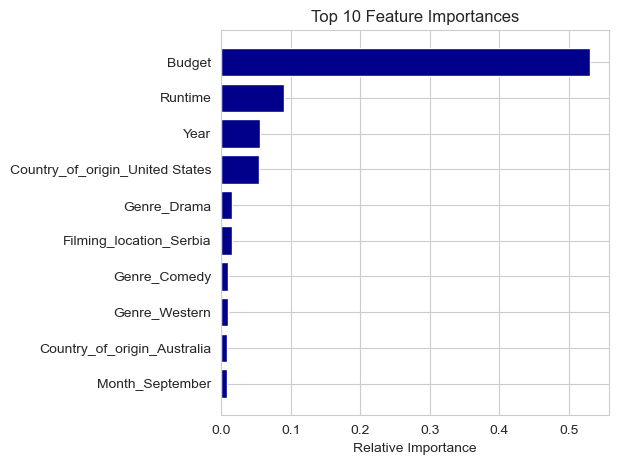

In [219]:
# plot top features importances determined by RandomForest
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # get the top 10 feature indices

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='darkblue', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

